# Python for Data Science

Machine Learning 2 - Feature Extraction, Model Evaluation, Scikit Learn API, ML Pipelines

In [ ]:
!pip install -r requirements.txt

# Overview

- Feature Extraction

- Model Evaluation

- Scikit Learn API: Estimators, Pipelines

- Application Example: A Text Classification Pipeline

- Hyperparameter Optimization

# Machine Learning Pipelines

![ml-pipeline-2.png](figures/ml-pipeline.png)

# Feature Extraction

- Feature extraction describes the transformations from **data** to **vectors**

   
- Extracting good features is **more important** than choosing a ML model


- We will cover some standard feature extractors, but there are many more


- Often the best feature extractors include domain knowledge by human experts


- Feature extractors have to be optimized along with all other model parameters
 

# Feature Extraction
   
- Continuous Features
- Categorical Features
- Text
- Images
  

## Continuous Features

- Continuous features: $x \in R^{d}$


- For many models continuous features don't need to be transformed


- For some models it is necessary or beneficial to **normalize** continuous features

    - When optimizing with stochastic gradient descent
    - When regularizing models: to control regularization

## Normalization: z-scoring

Given a feature $x\in R^1$ (and for multivariate $x$ analogously) there are several standard normalization options:

**Standard scaling / z-scoring**: compute mean $\mu_x$ and standard deviation $\sigma_x$ of $x$ and compute

$$ x \leftarrow \frac{(x - \mu_x) } {\sigma_x} $$

- Resulting variable has zero mean and unit variance
- Sometimes this is not possible
    - sparsity of data would be destroyed
    - mean / variance is difficult to compute
- See [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
     


In [3]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
scaler.fit(data)
print("Estimated Mean: {}".format(scaler.mean_))
scaler.transform([[.5, .5], [2,2]])

Estimated Mean: [0.5 0.5]


array([[0., 0.],
       [3., 3.]])

## Normalization: Min-Max Scaling   

**Min-max scaling**: compute min $\text{min}_x$ and max $\text{max}_x$ of $x$

$$ x \leftarrow \frac{(x - \text{min}_x) } {\text{max}_x - \text{min}_x} $$

- Resulting variable is in range [0,1] (or any other range)
- See [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)



## Categorical Features

Categorical features are variables $x \in \{ 0,1,2,\dots, N\}$ taking one value of a set of cardinality $N$ without an implicit ordering e.g.:
- colors (red, green, blue)
- user ids
- Movie ids

Often used feature transformations are 

- One-hot encoding

- More recently for neural networks: low dimensional embeddings


## One-hot encoding

Given a set of values [red, green, blue], we transform the data into 

- red $\leftarrow [1,0,0]$
- green $\leftarrow [0,1,0]$
- blue $\leftarrow [0,0,1]$

Sets of categorical variables can be represented as sum over single value vectors.

Examples: bag-of-words vectors


In [4]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X = [['red'], ['green'], ['blue'], ['red']]
enc.fit(X)
enc.transform([['red'], ['green'], ['blue']]).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

## One-hot encoding: Problems

- Cardinality needs to be estimated upfront
- New items / categories cannot be represented
- Similarity information is lost (light-blue and blue as different as black and white)

# Feature Extraction for Text

- Bag-of-Words
- Hashed Bag-of-Words
- (Continuous Bag-of-words)


## Bag-of-Words Features

Count word (=token) occurrences

<center>
"if you pay peanuts , you get monkeys ."
</center>

|get|if |monkeys | pay | peanuts| you |...|
|---|---|--------|-----|--------|-----|---|
|1  |1  | 1      |1    |   1    |  2  |...|
 

- Only accounts for word histogram
- Most of language structure lost
- Very efficient 

## Bag-of-Words Model with N-Grams

Count n-gram occurrences can account for some language structure


<center>
"if you pay peanuts , you get monkeys ."
</center>

|get monkeys|if you |you pay | pay peanuts | ...|
|---|---|--------|-----|---|
|1  |1  | 1      |1    |   ...|

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print("Vocabulary: {}".format(vectorizer.get_feature_names_out()))
X.toarray()

Vocabulary: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

## Character N-Grams

Instead of words as tokens you can take characters as tokens


<center>
"if you pay peanuts , you get monkeys ."
</center>

|g  | e | t | ge | et|...|
|---|---|---|----|---|---|
|1  |1  | 1 |1   | 1 |...|

Very powerful for language-independent models!

## Term Frequency / Inverse Document Frequency


Frequently occurring words (like ``the``) are often not very meaningful and are often weighted down by the **inverse document frequency**:


- Term frequency:

    $ \text{tf}(t,d) $: Frequency of a term $t$ in document $d$
    

- Inverse document frequency:

    $\text{idf} (t,d)=\log {\frac {|\text{Number of documents}|}{|\text{Number of Documents containing }t|}}$
    

## Alternatively: Stopwords

Just exclude some frequent meaningless words from the text. 

## N-Grams are expensive

$V=$ number of tokens in your vocabulary (usually 1e4 to 1e6 for good models)
- unigrams: all tokens

    Memory requirement for n-gram counts: $V$


- bigrams: all ordered pairs of **two** tokens

    Memory requirement for n-gram counts: $V^2$


- trigrams: all ordered pairs of **three** tokens

    Memory requirement for n-gram counts: $V^3$


- ...


See [Google's n-gram corpus](http://storage.googleapis.com/books/ngrams/books/datasetsv2.html) (up to 5-grams for many languages).

## Example: String Matching for Spelling Correction

Imagine you have a dictionary of correctly spelled words and list of misspelled words. 

**Character n-grams** can help you to efficiently find the correct spelling. 

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

animals = [
     'Alpaka',
     'Elefant',
     'Dog',
     'Cat']

vect = CountVectorizer(analyzer='char',ngram_range=(1,3)).fit(animals)

## The Learned Vocabulary of Character N-Grams

In [8]:
vect.vocabulary_

{'a': 0,
 'l': 25,
 'p': 34,
 'k': 23,
 'al': 3,
 'lp': 28,
 'pa': 35,
 'ak': 1,
 'ka': 24,
 'alp': 4,
 'lpa': 29,
 'pak': 36,
 'aka': 2,
 'e': 14,
 'f': 19,
 'n': 30,
 't': 37,
 'el': 17,
 'le': 26,
 'ef': 15,
 'fa': 20,
 'an': 5,
 'nt': 31,
 'ele': 18,
 'lef': 27,
 'efa': 16,
 'fan': 21,
 'ant': 6,
 'd': 11,
 'o': 32,
 'g': 22,
 'do': 12,
 'og': 33,
 'dog': 13,
 'c': 8,
 'ca': 9,
 'at': 7,
 'cat': 10}

## The Transformed Correctly Spelled Words

In [9]:
correct_spelling = vect.transform(animals)
correct_spelling.toarray()

array([[3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

## Computing String Similarity is a Matrix-Vector Multiplication

In [10]:
typo = 'olifant'
string_similarity = correct_spelling @ vect.transform([typo]).T.toarray()
string_similarity

array([[ 4],
       [10],
       [ 1],
       [ 2]])

In [11]:
animals[string_similarity.argmax()]

'Elefant'

## Hashed N-Grams

- Instead of counting all n-grams: Use a HashMap

- Each token gets hashed, count of hash-bucket incremented

- Advantages:
    - Full control over memory footprint (often small HashMaps work surprisingly well)
    - No need to compute a dictionary
    
    
- Disadvantages:
    - Hash collisions: multiple n-gram map to the same bucket
    - No Tf-Idf weighting: 



See [Scikit-Learn's HashingVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html)

## Feature Extraction for Images

- Classical features (e.g. HOG)

- CNN features
  

## Classical Computer Vision Feature Extractors

Histograms of Oriented Edges (HOG) descriptors capture shape very well. 

HOG features, just like most other oldschool vision feature descriptors, perform poorly compared to neural networks

Still, they could be helpful if shape on standardized images is the only relevant feature
  

In [22]:
from skimage.feature import hog
from skimage import data, exposure, io

# image = data.astronaut()
image = io.imread("figures/turing.png")

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)


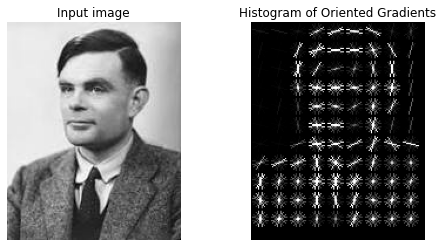

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

## Convolutional Neural Networks

State of the art in computer vision are convolutional neural networks

We don't have time in this lecture to go into detail (see e.g. Kristian Hildebrand's lecture)

And most people don't have the compute to train those models from scratch

But pretrained models are good feature extractors and don't require training

In [24]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = 'figures/turing.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)
print("image dimensions: {}".format(x.shape))
print("image feature dimensions: {}".format(block4_pool_features.shape))

2021-12-29 11:04:07.089699: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


image dimensions: (1, 224, 224, 3)
image feature dimensions: (1, 14, 14, 512)


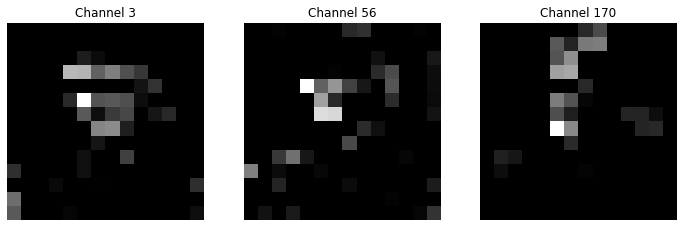

In [25]:
def plot_channel(img, channel, ax):
    ax.axis('off')
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_title('Channel {}'.format(channel))

channels = [3, 56, 170]

_, axs = plt.subplots(1, len(channels), figsize=(12, 4), sharex=True, sharey=True)

for channel, ax in zip(channels, axs):
    plot_channel(block4_pool_features[0,:,:,channel], channel, ax)